


I picked the dataset from this kaggle source - https://www.kaggle.com/datasets/stealthtechnologies/predict-lifespan-of-a-comet-goldfish

THIS DATASET PROVIDES SOME USEFUL PERDICTOR VARIABLES IN ORDER TO PREDICT LIFESPAN
The age of a Comet goldfish is not directly influenced by their population. Instead, their lifespan is determined by various factors, including care, environment, and genetics. Let's explore these aspects:

In [339]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.sparse import coo_matrix
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.datasets import make_classification
from sklearn.random_projection import GaussianRandomProjection

In [5]:
df = pd.read_csv('~/fish_data.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2000 non-null   int64  
 1   average_length(inches))  2000 non-null   float64
 2   average_weight(inches))  2000 non-null   float64
 3   habitat                  2000 non-null   object 
 4   ph_of_water              2000 non-null   float64
 5   color                    2000 non-null   object 
 6   Gender                   1976 non-null   object 
 7   life_span                2000 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 125.1+ KB


In [7]:
df.head()

,id,average_length(inches)),average_weight(inches)),habitat,ph_of_water,color,Gender,life_span
0,1,14.69,5.87,ponds,6.2,Reddish_Orange,False,10.9
1,2,1.32,3.86,idlewater,6.8,Calico,True,5.2
2,3,14.23,12.09,lakes,7.9,Reddish_Orange,True,25.3
3,4,2.54,3.20,rivers,6.7,White,False,16.4
4,5,13.10,9.81,lakes,7.8,Orange,True,3.2


In [10]:
null_values = df['Gender'].isnull().sum()
print("Number of null values in the 'Gender' column:", null_values)

Number of null values in the 'Gender' column: 24


In [11]:
# Lets verify the distribution of average_length and average_weight distributions for each gender.

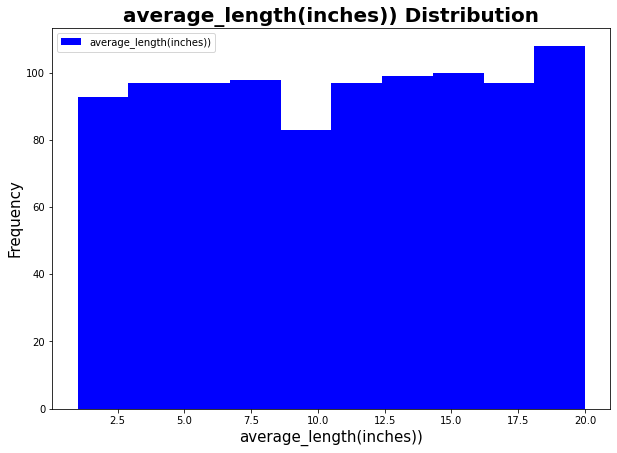

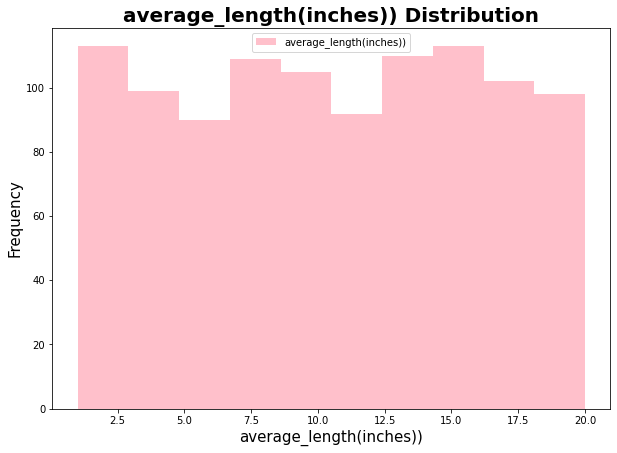

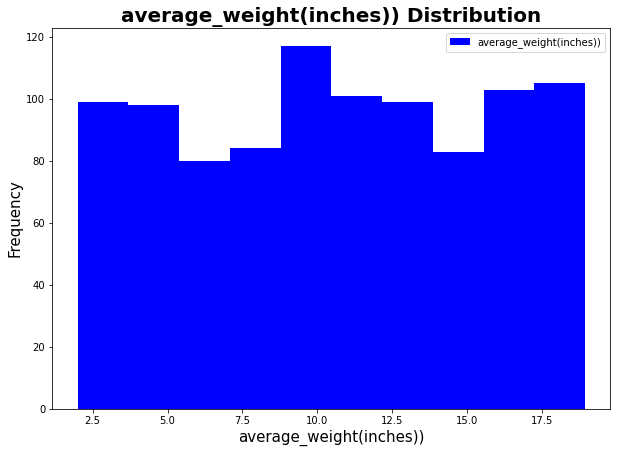

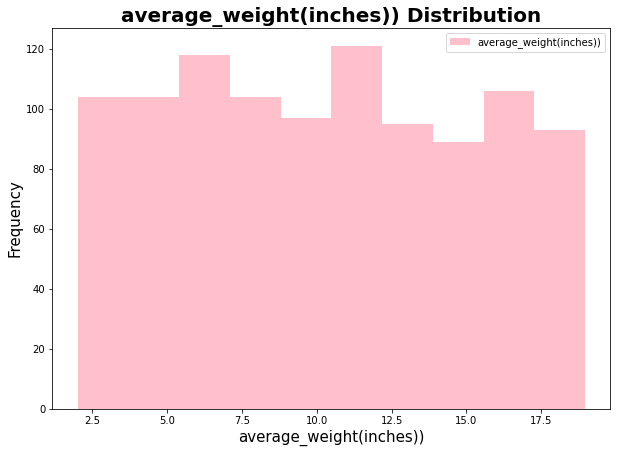

In [49]:
male_data = df[df['Gender'] == True]
female_data = df[df['Gender'] == False]

# lets create an function to plot histograms, this will reduce the coding efforts
def plot_histogram(data, label, color):
    plt.figure(figsize=(10, 7))
    plt.hist(data, label=label, color=color)
    plt.title(label + ' Distribution', fontsize=20, fontweight='bold')
    plt.xlabel(label, fontsize=15)
    plt.ylabel('Frequency', fontsize=15)
    plt.legend()
    plt.show()

plot_histogram(male_data['average_length(inches))'], 'average_length(inches))', 'blue')
plot_histogram(female_data['average_length(inches))'], 'average_length(inches))', 'pink')
plot_histogram(male_data['average_weight(inches))'], 'average_weight(inches))', 'blue')
plot_histogram(female_data['average_weight(inches))'], 'average_weight(inches))', 'pink')


The distribution isnt having any dissimilarities for each gender. Both genders are random and not following any pattern. So we cant fill the missing variables with the patters. So lets use the mode to fill them all.

In [40]:
gender_mode = df['Gender'].mode()[0]
df['Gender'].fillna(gender_mode, inplace=True)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2000 non-null   int64  
 1   average_length(inches))  2000 non-null   float64
 2   average_weight(inches))  2000 non-null   float64
 3   habitat                  2000 non-null   object 
 4   ph_of_water              2000 non-null   float64
 5   color                    2000 non-null   object 
 6   Gender                   2000 non-null   bool   
 7   life_span                2000 non-null   float64
dtypes: bool(1), float64(4), int64(1), object(2)
memory usage: 111.5+ KB


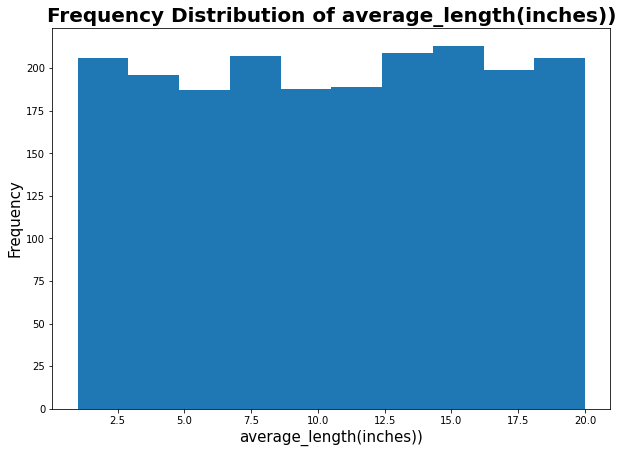

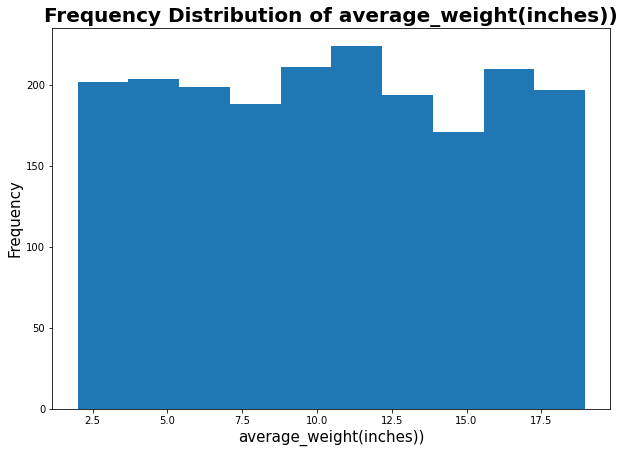

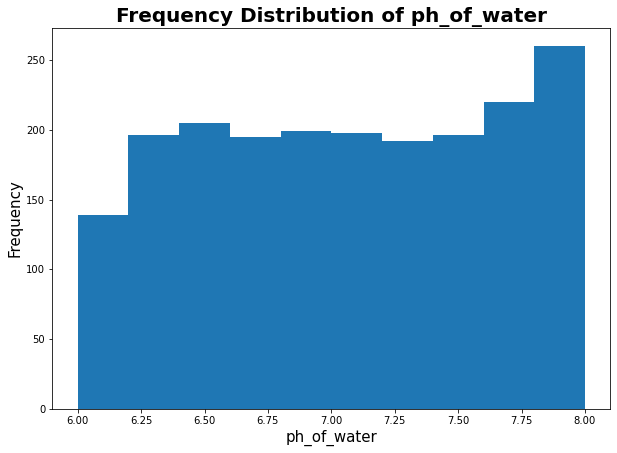

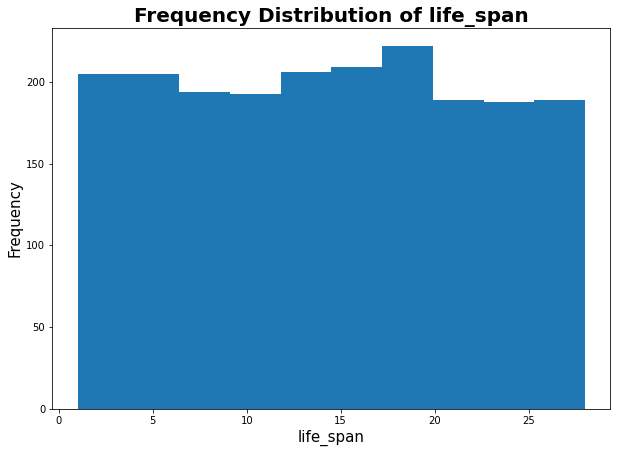

In [52]:
numerical_columns = ['average_length(inches))', 'average_weight(inches))', 'ph_of_water', 'life_span']

for column in numerical_columns:
    plt.figure(figsize=(10, 7))
    plt.hist(df[column])
    plt.xlabel(column, fontsize=15)
    plt.ylabel('Frequency', fontsize=15)
    plt.title(f'Frequency Distribution of {column}', fontsize=20, fontweight='bold')
    plt.show()

The distribution's variation arent much. The distributions' ranges are not high except for pf water. Nonethless we will apply standerdization methods for the data.

In [57]:
numerical_columns = ['average_length(inches))', 'average_weight(inches))', 'ph_of_water', 'life_span']
scaler = StandardScaler()

df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [58]:
df.head()

,id,average_length(inches)),average_weight(inches)),habitat,ph_of_water,color,Gender,life_span
0,1,0.748744,-0.937591,ponds,-1.411645,Reddish_Orange,False,-0.450609
1,2,-1.673460,-1.349117,idlewater,-0.372333,Calico,True,-1.190481
2,3,0.665407,0.335886,lakes,1.533071,Reddish_Orange,True,1.418544
3,4,-1.452436,-1.484245,rivers,-0.545552,White,False,0.263304
4,5,0.460688,-0.130919,lakes,1.359852,Orange,True,-1.450086


In [59]:
df['Gender'] = df['Gender'].replace({True: 'Male', False: 'Female'})

In [60]:
df.head()

,id,average_length(inches)),average_weight(inches)),habitat,ph_of_water,color,Gender,life_span
0,1,0.748744,-0.937591,ponds,-1.411645,Reddish_Orange,Female,-0.450609
1,2,-1.673460,-1.349117,idlewater,-0.372333,Calico,Male,-1.190481
2,3,0.665407,0.335886,lakes,1.533071,Reddish_Orange,Male,1.418544
3,4,-1.452436,-1.484245,rivers,-0.545552,White,Female,0.263304
4,5,0.460688,-0.130919,lakes,1.359852,Orange,Male,-1.450086


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2000 non-null   int64  
 1   average_length(inches))  2000 non-null   float64
 2   average_weight(inches))  2000 non-null   float64
 3   habitat                  2000 non-null   object 
 4   ph_of_water              2000 non-null   float64
 5   color                    2000 non-null   object 
 6   Gender                   2000 non-null   object 
 7   life_span                2000 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 125.1+ KB


In [63]:
encoded_df = pd.get_dummies(df, columns=['habitat', 'color', 'Gender'])

In [65]:
encoded_df

,id,average_length(inches)),average_weight(inches)),ph_of_water,life_span,habitat_idlewater,habitat_lakes,habitat_ponds,habitat_rivers,habitat_slowmovingwaters,...,color_Calico,color_Green_and_Chocolate,color_Orange,color_Red_and_Silver,color_Red_and_White_Bi_Color,color_Reddish_Orange,color_White,color_Yellow,Gender_Female,Gender_Male
0,1,0.748744,-0.937591,-1.411645,-0.450609,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
1,2,-1.673460,-1.349117,-0.372333,-1.190481,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,3,0.665407,0.335886,1.533071,1.418544,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,4,-1.452436,-1.484245,-0.545552,0.263304,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
4,5,0.460688,-0.130919,1.359852,-1.450086,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,1.007812,-0.816795,1.706289,-1.034719,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1996,1997,-0.553848,-0.691904,-1.238426,-0.048222,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1997,1998,-0.006723,-1.469913,-1.584863,-0.165044,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
1998,1999,-0.517614,1.015619,1.359852,0.159462,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0


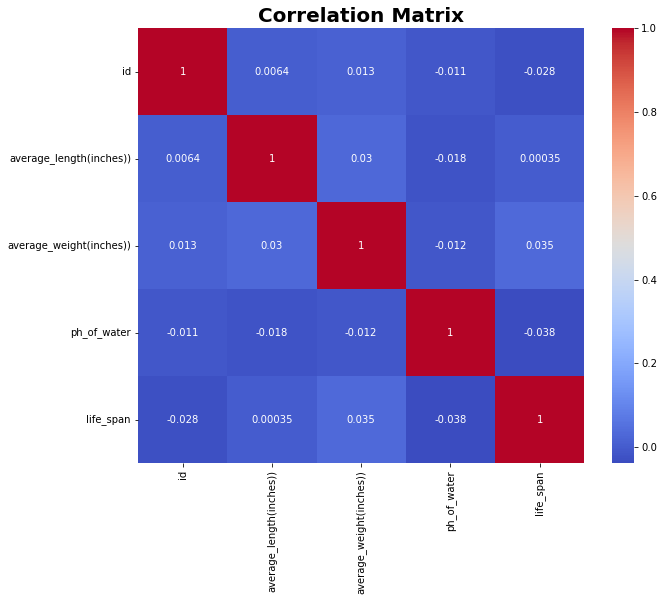

In [71]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix', fontsize=20, fontweight='bold')
plt.show()

From above we can observe that no two variables are highly correlated. So we dont need to worry about the Multicollinearity.

### Task 2: (5 points)


https://archive.ics.uci.edu/ml/datasets/Farm+Ads#

#### Note:

 - https://www.kaggle.com/code/bcantt/farm-ads-starter-ml. (BARIŞ CAN TAYIZ)



//

from sklearn import preprocessing
farm_ads = pd.read_csv('/kaggle/input/farm-ads-binary-classification/farm-ads',sep = " ",error_bad_lines=False,header=None)
farm_vect = pd.read_csv('/kaggle/input/farm-ads-binary-classification/farm-ads-vect',sep = " ",error_bad_lines=False,header=None)
data = farm_ads.merge(farm_vect,right_index = True,left_index = True)
le = preprocessing.LabelEncoder()
for name in data.columns:
    if data[name].dtypes == "O":
        print(name)
        data[name] = data[name].astype(str)
        le.fit(data[name])
        data[name] = le.transform(data[name])
        
//

In [243]:
df2_1.info()
df2_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       317 non-null    int64 
 1   1       317 non-null    object
 2   2       317 non-null    object
 3   3       317 non-null    object
 4   4       317 non-null    object
 5   5       316 non-null    object
 6   6       310 non-null    object
 7   7       309 non-null    object
 8   8       303 non-null    object
 9   9       282 non-null    object
 10  10      175 non-null    object
 11  11      123 non-null    object
dtypes: int64(1), object(11)
memory usage: 29.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321 entries, 0 to 320
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       321 non-null    int64 
 1   1       321 non-null    object
 2   2       321 non-null    object
 3   3       321 non-null    object
 4   4       321 n

In [244]:
df2 = df2_1.merge(df2_2,right_index = True,left_index = True)

In [276]:
df2.head()

,0_x,1_x,2_x,3_x,4_x,5_x,6_x,7_x,8_x,9_x,...,0_y,1_y,2_y,3_y,4_y,5_y,6_y,7_y,8_y,9_y
0,1,ad-jerry,ad-bruckheimer,ad-chase,ad-premier,ad-sept,ad-th,ad-clip,ad-bruckheimer,ad-chase,...,1,1:1,2:1,3:1,4:1,5:1,6:1,7:1,8:1,9:1
1,-1,ad-symptom,ad-muscle,ad-weakness,ad-genetic,ad-disease,ad-symptom,ad-include,ad-search,ad-learn,...,1,8:1,9:1,437:1,438:1,439:1,440:1,441:1,442:1,NaN
2,1,ad-animal,ad-animal,ad-wild,ad-sa,ad-official,ad-tourism,ad-website,page,found,...,1,4250:1,4251:1,4252:1,4253:1,4254:1,4255:1,4256:1,4257:1,NaN
3,-1,ad-vaccination,ad-expert,ad-tip,ad-info,ad-article,ad-treatment,ad-option,ad-support,page,...,1,963:1,964:1,965:1,966:1,967:1,968:1,2078:1,3303:1,NaN
4,1,ad-vet,ad-online,ad-veterinarian,ad-online,ad-question,ad-answer,ad-asap,bad,request,...,-1,8:1,9:1,16:1,436:1,5563:1,5564:1,5565:1,5566:1,NaN


In [273]:
df2.columns

Index(['0_x', '1_x', '2_x', '3_x', '4_x', '5_x', '6_x', '7_x', '8_x', '9_x',
          10,    11, '0_y', '1_y', '2_y', '3_y', '4_y', '5_y', '6_y', '7_y',
       '8_y', '9_y'],
      dtype='object')

In [274]:
df2_1.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1,ad-jerry,ad-bruckheimer,ad-chase,ad-premier,ad-sept,ad-th,ad-clip,ad-bruckheimer,ad-chase,page,found
1,-1,ad-symptom,ad-muscle,ad-weakness,ad-genetic,ad-disease,ad-symptom,ad-include,ad-search,ad-learn,page,found
2,1,ad-animal,ad-animal,ad-wild,ad-sa,ad-official,ad-tourism,ad-website,page,found,NaN,NaN
3,-1,ad-vaccination,ad-expert,ad-tip,ad-info,ad-article,ad-treatment,ad-option,ad-support,page,found,NaN
4,1,ad-vet,ad-online,ad-veterinarian,ad-online,ad-question,ad-answer,ad-asap,bad,request,NaN,NaN


In [275]:
df2_2.head()

,0,1,2,3,4,5,6,7,8,9
0,1,1:1,2:1,3:1,4:1,5:1,6:1,7:1,8:1,9:1
1,1,8:1,9:1,437:1,438:1,439:1,440:1,441:1,442:1,NaN
2,1,4250:1,4251:1,4252:1,4253:1,4254:1,4255:1,4256:1,4257:1,NaN
3,1,963:1,964:1,965:1,966:1,967:1,968:1,2078:1,3303:1,NaN
4,-1,8:1,9:1,16:1,436:1,5563:1,5564:1,5565:1,5566:1,NaN


As its mentioned that the first feature of the both datasets shows weather the AD is accepted or rejected, we will consider that as a target variable. We can make the summetion of it and declare it as target variable

In [277]:
df2['target_variable'] = df2['0_x'] + df2['0_y']

In [281]:
df2['target_variable'].unique()

array([ 2,  0, -2])

In [303]:
le = preprocessing.LabelEncoder()
for name in df2.columns:
    if df2[name].dtypes == "O":
        print(name)
        df2[name] = df2[name].astype(str)
        le.fit(df2[name])
        df2[name] = le.transform(df2[name])

1_x
2_x
3_x
4_x
5_x
6_x
7_x
8_x
9_x
10
11
1_y
2_y
3_y
4_y
5_y
6_y
7_y
8_y
9_y


In [306]:
df2.drop(['0_x','0_y'],axis = 1)

,1_x,2_x,3_x,4_x,5_x,6_x,7_x,8_x,9_x,10,...,1_y,2_y,3_y,4_y,5_y,6_y,7_y,8_y,9_y,target_variable
0,34,8,13,56,70,71,11,7,5,10,...,2,5,19,42,61,66,75,77,36,2
1,72,48,76,30,17,69,38,43,16,10,...,15,24,28,38,35,36,52,61,37,0
2,1,3,78,66,50,72,79,64,39,9,...,9,9,22,30,30,33,50,59,37,2
3,78,22,72,39,5,73,49,49,41,8,...,17,22,47,63,75,76,34,51,37,0
4,79,52,75,52,60,0,2,60,42,9,...,15,24,11,37,52,49,61,69,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,1,3,78,66,50,72,79,64,39,9,...,15,24,38,5,26,58,70,74,37,2
313,79,52,75,52,60,0,2,60,42,9,...,15,24,38,31,48,64,5,58,31,0
314,15,52,24,52,60,0,2,60,42,9,...,15,24,24,36,38,42,78,79,37,0
315,48,51,61,34,13,17,86,62,40,9,...,15,24,11,37,73,49,61,14,37,0


In [ ]:
features = df2.drop(['target_variable'], axis=1)
target = df2['target_variable']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)
model = LogisticRegression(penalty='l1', solver='liblinear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)

### PCA:

In [ ]:
features = df2.drop(['target_variable'], axis=1)
target = df2['target_variable']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

accuracy_scores = []

for n in range(1,len(features.columns)):
    pca = PCA(n_components=n)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    
    model = LogisticRegression(penalty='l1', solver='liblinear')
    model.fit(X_train_pca, y_train)
    accuracy = model.score(X_test_pca, y_test)
    accuracy_scores.append(accuracy)
    

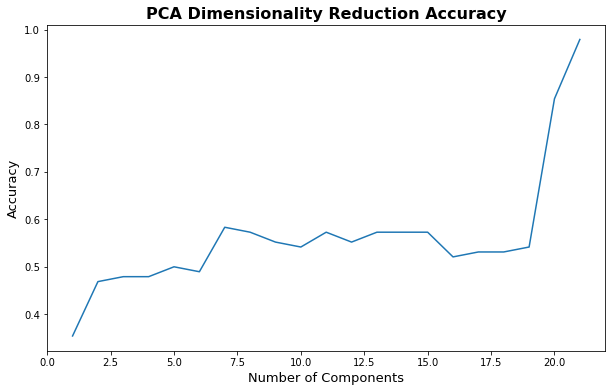

In [329]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(features.columns)), accuracy_scores)
plt.xlabel('Number of Components', fontsize=13)
plt.ylabel('Accuracy', fontsize=13)
plt.title('PCA Dimensionality Reduction Accuracy', fontsize=16, fontweight='bold')
plt.show()

### MDS

In [ ]:


features = df2.drop(['target_variable'], axis=1)
target = df2['target_variable']
accuracy_scores = []

for n in range(1, len(features.columns)):
    
    mds = MDS(n_components=n, random_state=42)
    features_mds = mds.fit_transform(features)
    X_train, X_test, y_train, y_test = train_test_split(features_mds, target, test_size=0.3, random_state=42)
    
    model = LogisticRegression(penalty='l1', solver='liblinear')
    model.fit(X_train, y_train)
    accuracy = model.score(X_test, y_test)
    accuracy_scores.append(accuracy)


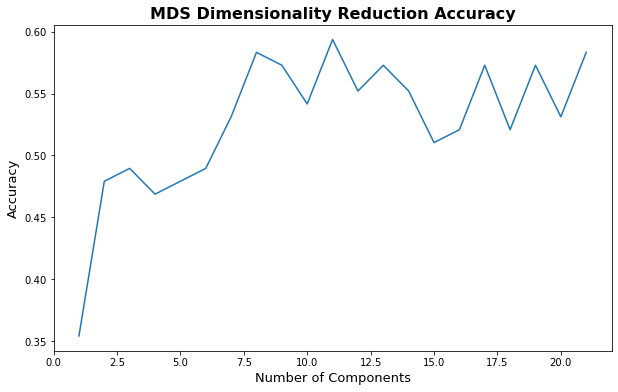

In [338]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(features.columns)), accuracy_scores)
plt.xlabel('Number of Components', fontsize=13)
plt.ylabel('Accuracy', fontsize=13)
plt.title('MDS Dimensionality Reduction Accuracy', fontsize=16, fontweight='bold')
plt.show()

### GRP

In [ ]:



accuracy_scores = []

for n in range(1, len(features.columns)):
    grp = GaussianRandomProjection(n_components=n, random_state=42)
    features_grp = grp.fit_transform(features)
    X_train, X_test, y_train, y_test = train_test_split(features_grp, target, test_size=0.3, random_state=42)
    
    logreg = LogisticRegression(penalty='l1', solver='liblinear')
    logreg.fit(X_train, y_train)
    accuracy = logreg.score(X_test, y_test)
    accuracy_scores.append(accuracy)

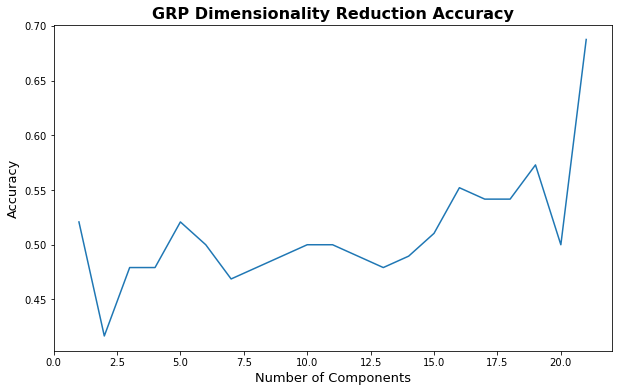

In [347]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(features.columns)), accuracy_scores[:len(features.columns)-1])
plt.xlabel('Number of Components', fontsize=13)
plt.ylabel('Accuracy', fontsize=13)
plt.title('GRP Dimensionality Reduction Accuracy', fontsize=16, fontweight='bold')
plt.show()

From the above plots we can observe that all three dimensionality reduction techniques improved accuracy when the features are more. This is due to the overfitting of the model. We can safely undersatnd this because logestic regression got the classification accuracy of 1 without any dimensionality reduction techniqie. This clearly indicated the overfitting nature.

Now the PCA has best performance at the 6 components and became cosistant later to it. Its interesting how dimensionality reduction helped in avaoiding overfitting. But also we can run more pre processign techniqies to avoid the un related variables which can increase the PCA effect and improve the accuracy.

The MDS hit its highest at 11 components which shows the improved way than PCA technique in this case. But it also stayed same around the 8 to full features.

The GRP techniqie performed very least with low accuracies hitting high efficiency around 19. This is not a safe method to apply at this level because of the overfitting nature.

Overall i felt PCA method is best suitable here in this case, ussually its performace in the case of sparse dataset helped in our scenario. So i will pick up the PCA dimensionality techniqie for this and make sure i wont overfit the model when running.



EEG Steady-State Visual Evoked Potential Signals Data Set  (Links to an external site.) Links to an external site.
 (Links to an external site.)Repeat Consumption Matrices Data Set (Links to an external site.)
Make sure all the features are numerical and then try to use what you learned in this course to visualize these two datasets. Report the plots you made as well as any structure you noticed in the dataset.

#### Part 1

In [96]:
# Five Box Visual Test 1
df3_1 = pd.read_csv('~/task3/A001SB1_1.csv')

In [98]:
df3_1.head()

,title:sujeto 1,recorded:30.06.20 13.24.04,sampling:128,subject:sujeto 1,labels:COUNTER INTERPOLATED AF3 F7 F3 FC5 T7 P7 O1 O2 P8 T8 FC6 F4 F8 AF4,chan:37,units:emotiv,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,17,0,4183.589641,4191.794769,4178.461436,4168.205026,4257.948614,4202.051179,4231.794768,4202.051179,4237.948614,4204.102461,4168.717847,4186.666564,4181.025539,4180.512718
1,18,0,4183.589641,4200.512718,4179.999898,4193.333231,4241.538358,4182.564000,4225.128102,4199.487077,4235.384512,4194.871692,4172.307590,4193.846051,4185.640923,4184.615282
2,19,0,4198.461436,4207.692205,4188.717846,4206.153743,4229.743486,4196.410154,4229.743486,4210.256307,4247.179383,4208.717846,4191.281949,4203.076820,4195.897333,4196.922974
3,20,0,4198.974256,4191.794769,4184.615282,4184.102462,4231.281948,4203.589641,4232.820409,4209.230666,4241.025537,4207.179384,4189.230667,4201.538359,4193.846051,4197.948615
4,21,0,4187.179385,4184.102462,4176.922975,4169.230667,4204.102461,4196.922974,4230.769127,4204.615282,4235.384512,4182.051180,4181.538359,4201.025538,4190.769128,4189.743487


In [104]:
feature_names = ['title', 'recorded', 'AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4']

df3_1.columns = feature_names

In [105]:
df3_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   title     2944 non-null   int64  
 1   recorded  2944 non-null   int64  
 2   AF3       2944 non-null   float64
 3   F7        2944 non-null   float64
 4   F3        2944 non-null   float64
 5   FC5       2944 non-null   float64
 6   T7        2944 non-null   float64
 7   P7        2944 non-null   float64
 8   O1        2944 non-null   float64
 9   O2        2944 non-null   float64
 10  P8        2944 non-null   float64
 11  T8        2944 non-null   float64
 12  FC6       2944 non-null   float64
 13  F4        2944 non-null   float64
 14  F8        2944 non-null   float64
 15  AF4       2944 non-null   float64
dtypes: float64(14), int64(2)
memory usage: 368.1 KB


In [106]:
df3_1.head()

,title,recorded,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4
0,17,0,4183.589641,4191.794769,4178.461436,4168.205026,4257.948614,4202.051179,4231.794768,4202.051179,4237.948614,4204.102461,4168.717847,4186.666564,4181.025539,4180.512718
1,18,0,4183.589641,4200.512718,4179.999898,4193.333231,4241.538358,4182.564000,4225.128102,4199.487077,4235.384512,4194.871692,4172.307590,4193.846051,4185.640923,4184.615282
2,19,0,4198.461436,4207.692205,4188.717846,4206.153743,4229.743486,4196.410154,4229.743486,4210.256307,4247.179383,4208.717846,4191.281949,4203.076820,4195.897333,4196.922974
3,20,0,4198.974256,4191.794769,4184.615282,4184.102462,4231.281948,4203.589641,4232.820409,4209.230666,4241.025537,4207.179384,4189.230667,4201.538359,4193.846051,4197.948615
4,21,0,4187.179385,4184.102462,4176.922975,4169.230667,4204.102461,4196.922974,4230.769127,4204.615282,4235.384512,4182.051180,4181.538359,4201.025538,4190.769128,4189.743487


### Below is the image of EEG scan sensor positions:

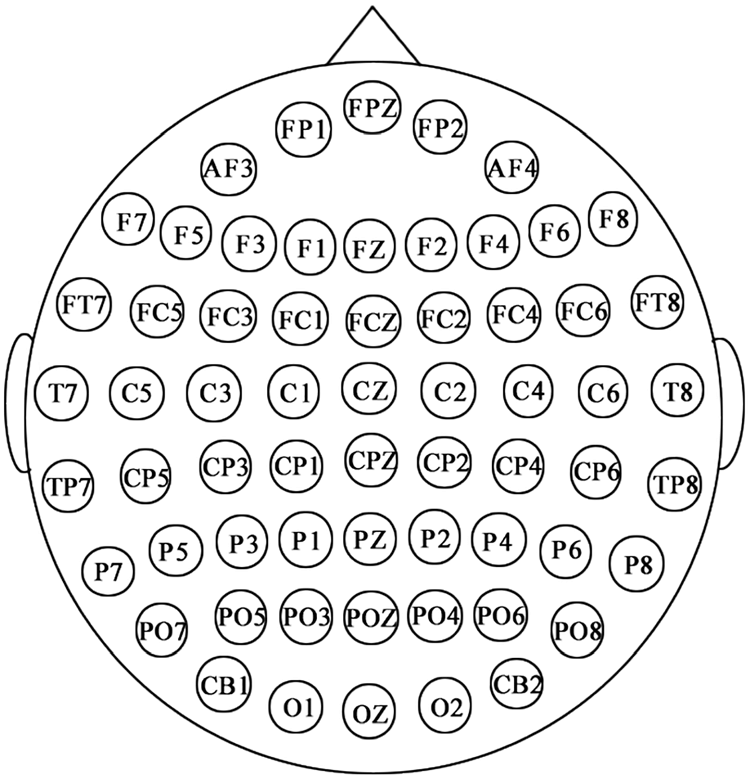
Above is the positions of the EEG electrodes. We will use this positioning of electrodes to analyze the data.

Source : https://www.researchgate.net/figure/The-EEG-cap-layout-for-62-electrodes_fig7_276443876

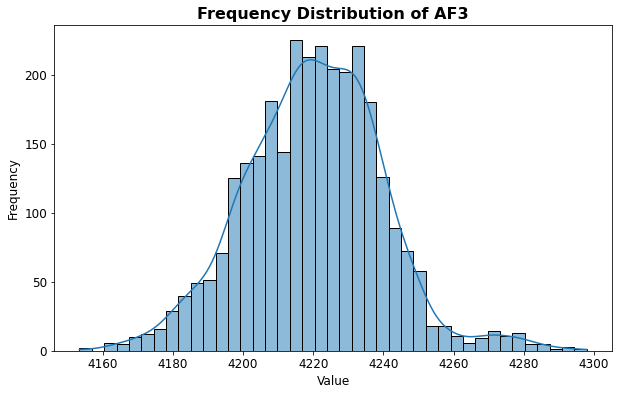

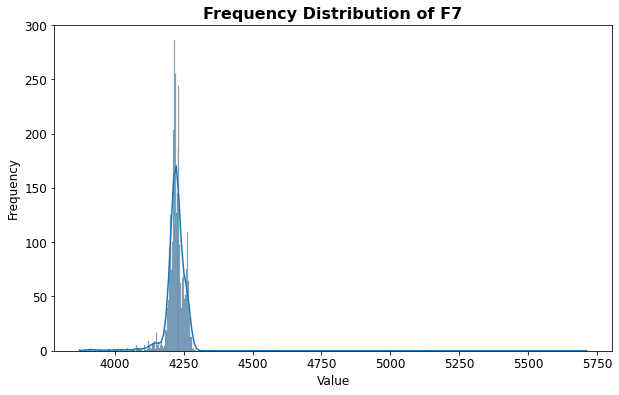

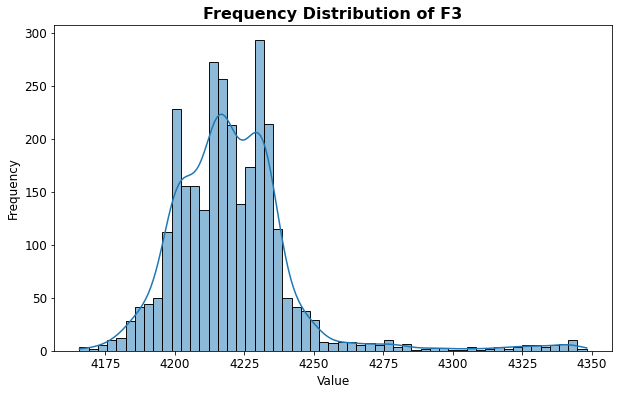

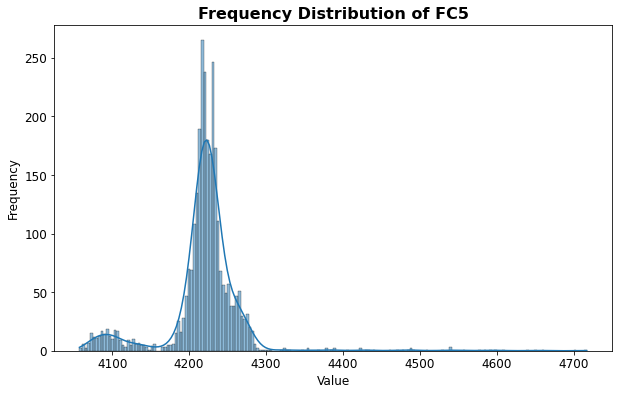

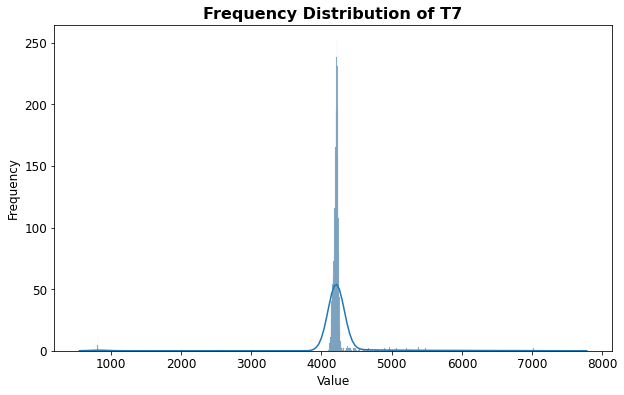

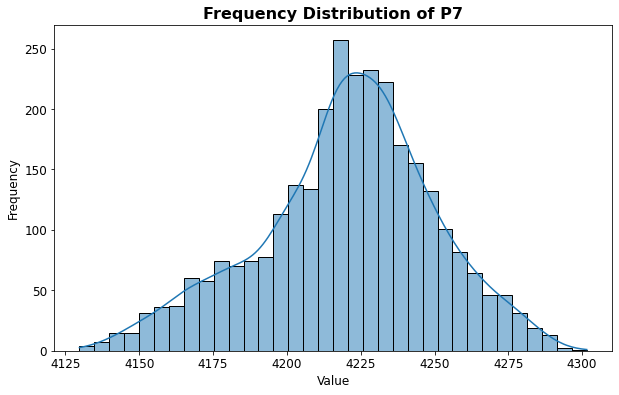

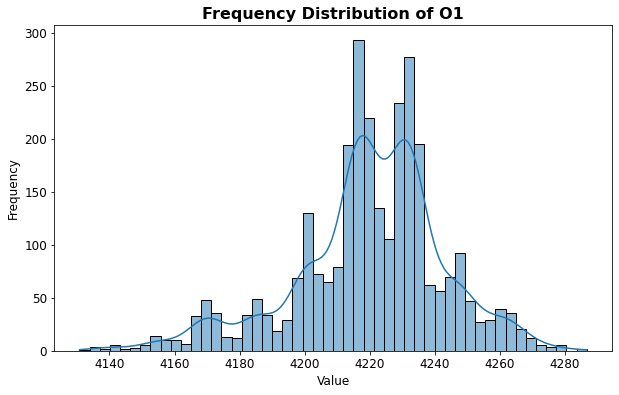

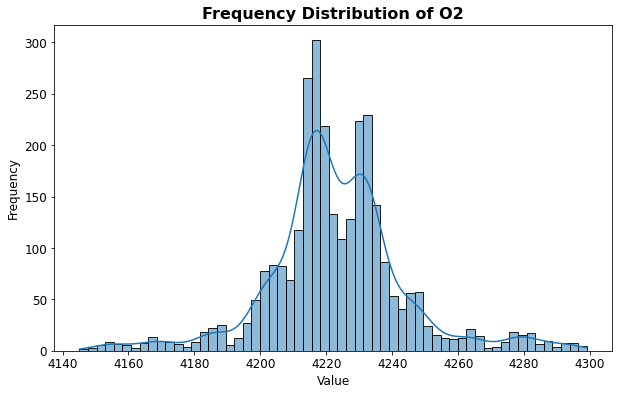

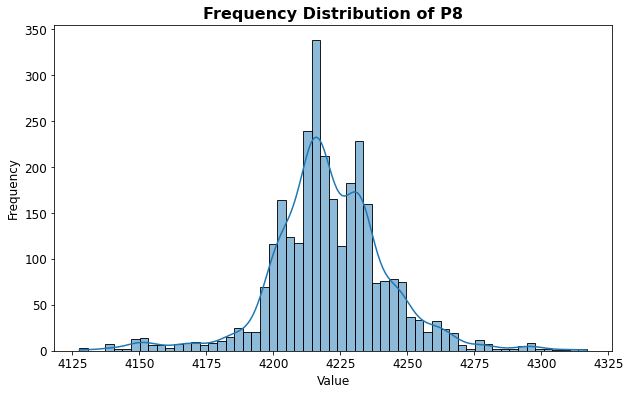

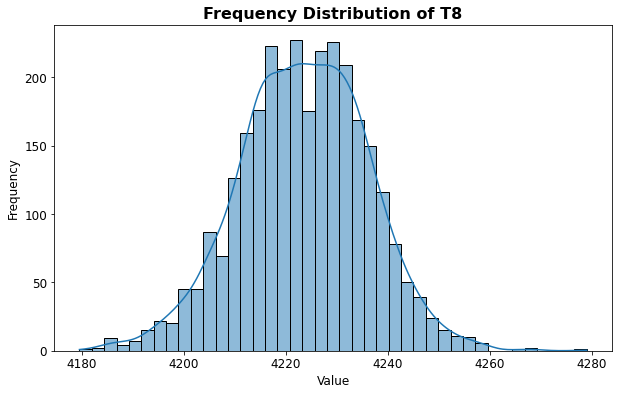

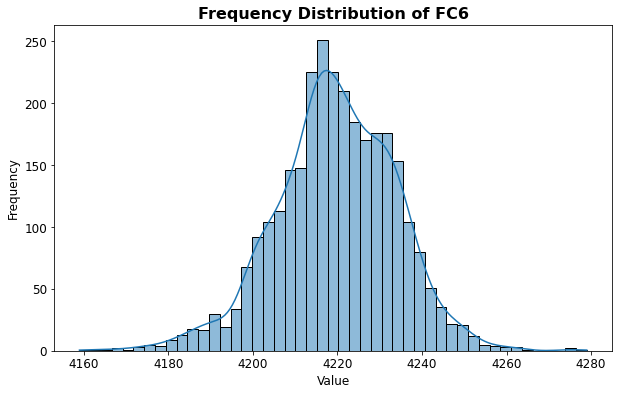

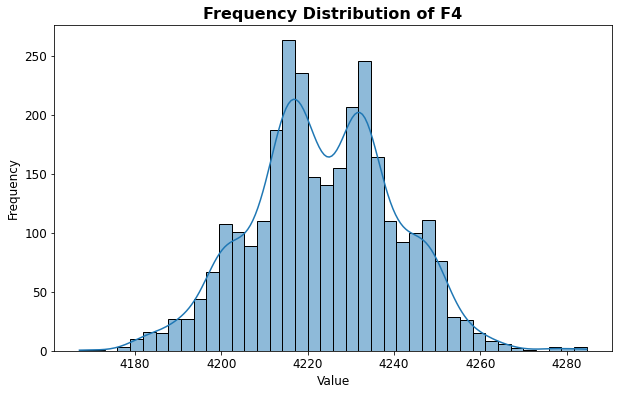

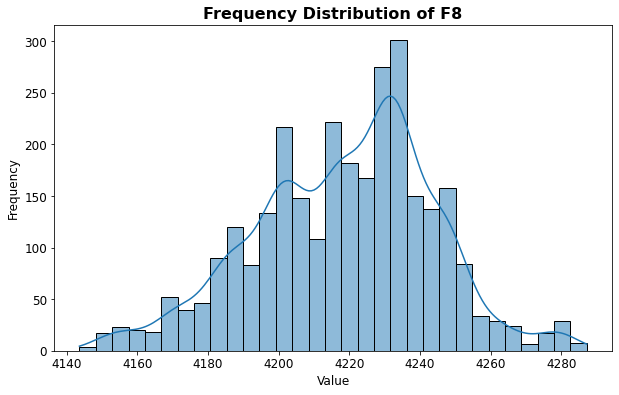

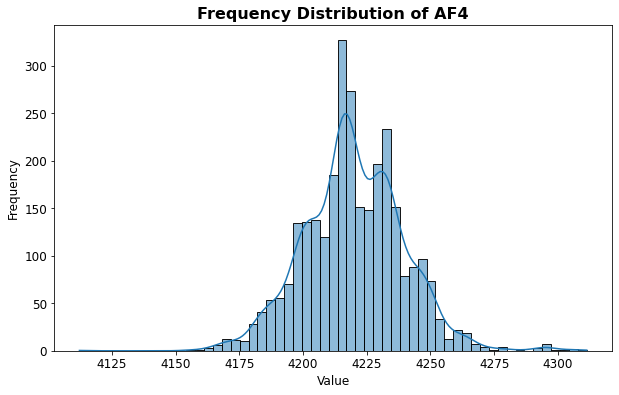

In [162]:
electrode_columns = df3_1.columns[2:]

for column in electrode_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df3_1[column], kde=True)
    plt.title(f'Frequency Distribution of {column}', fontsize=16, fontweight='bold')
    plt.xlabel('Value', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.xticks(fontsize=12)  
    plt.yticks(fontsize=12) 
    plt.show()

The frequency distributions arenot abnormal exceot for T7  sensor. The T7 position is left temporal from the picture and it does show that values are more concentrated at 4000 value but disperesed all over. This can be from improper or wrong placement of sensor. May be its caused because of side temporal activity is consistant at a particular value.

Other distributions all look normal and may need timeseries analysis to understand more about this subject in test. So we will divide the right and left parts of brain and analyze them.

In [132]:
left_sensors = ['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1']
right_sensors = ['AF4', 'F8', 'F4', 'FC6', 'T8', 'P8', 'O2']



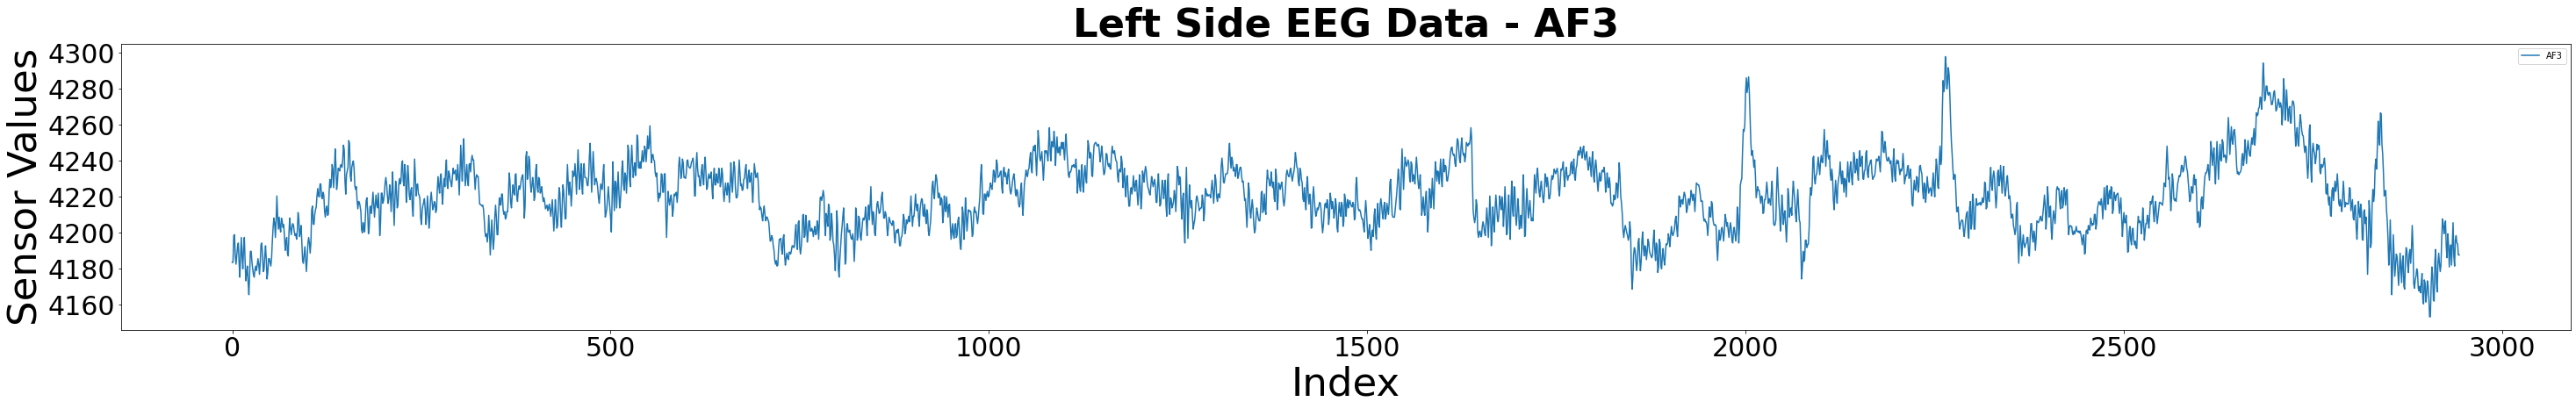

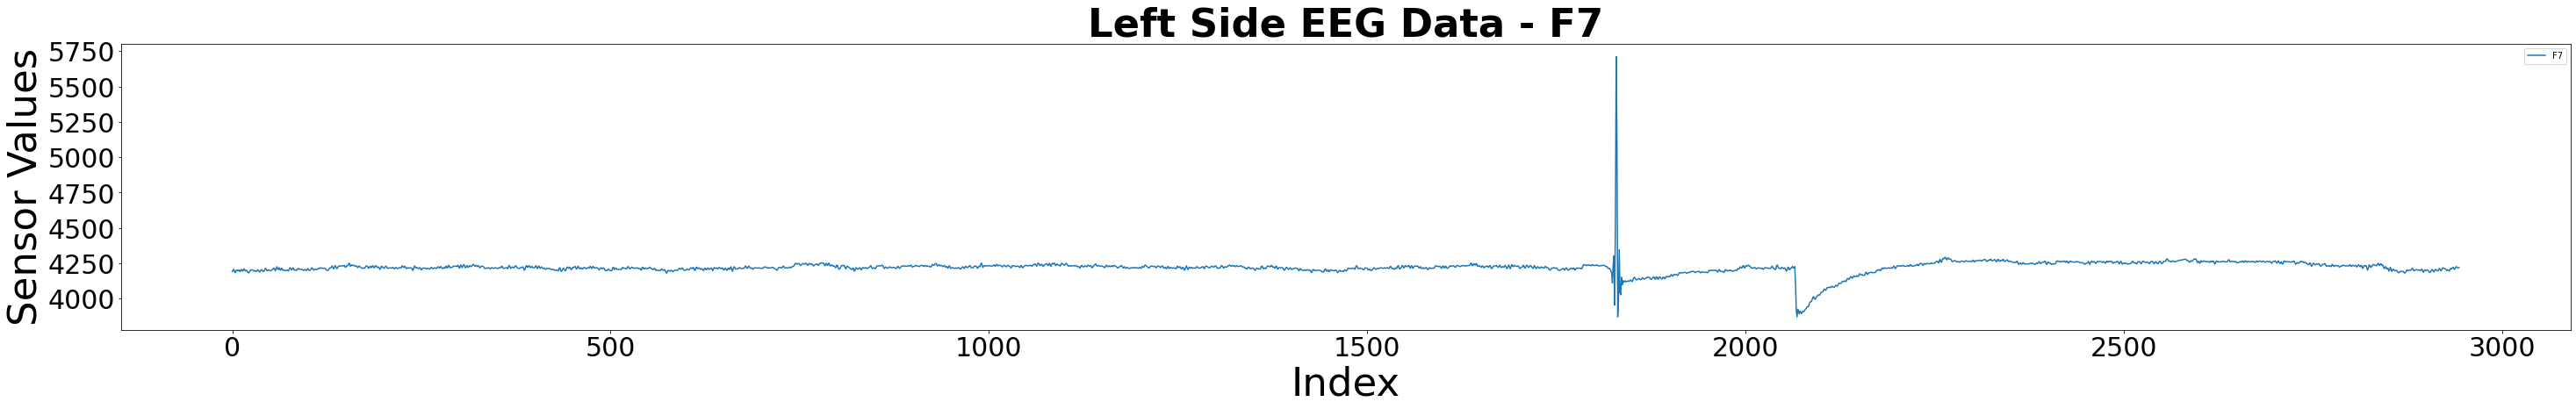

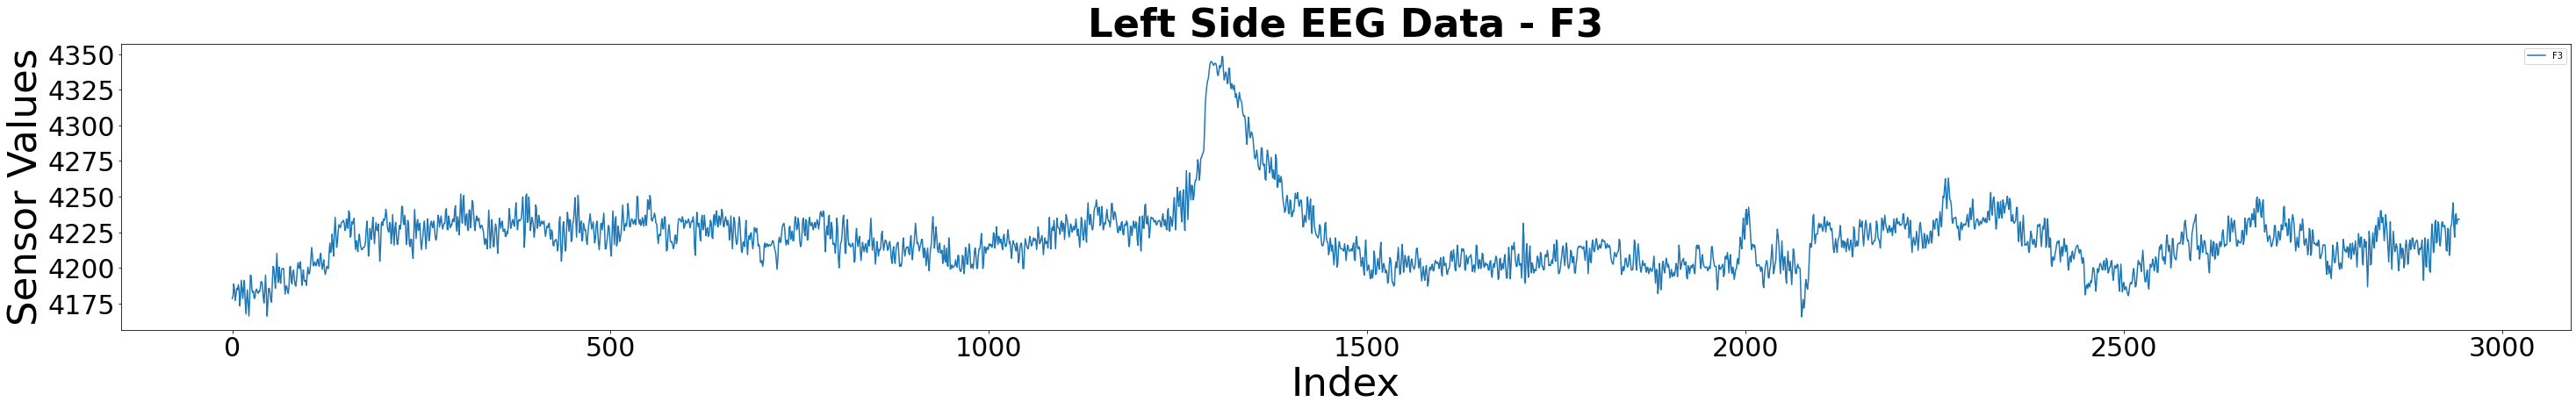

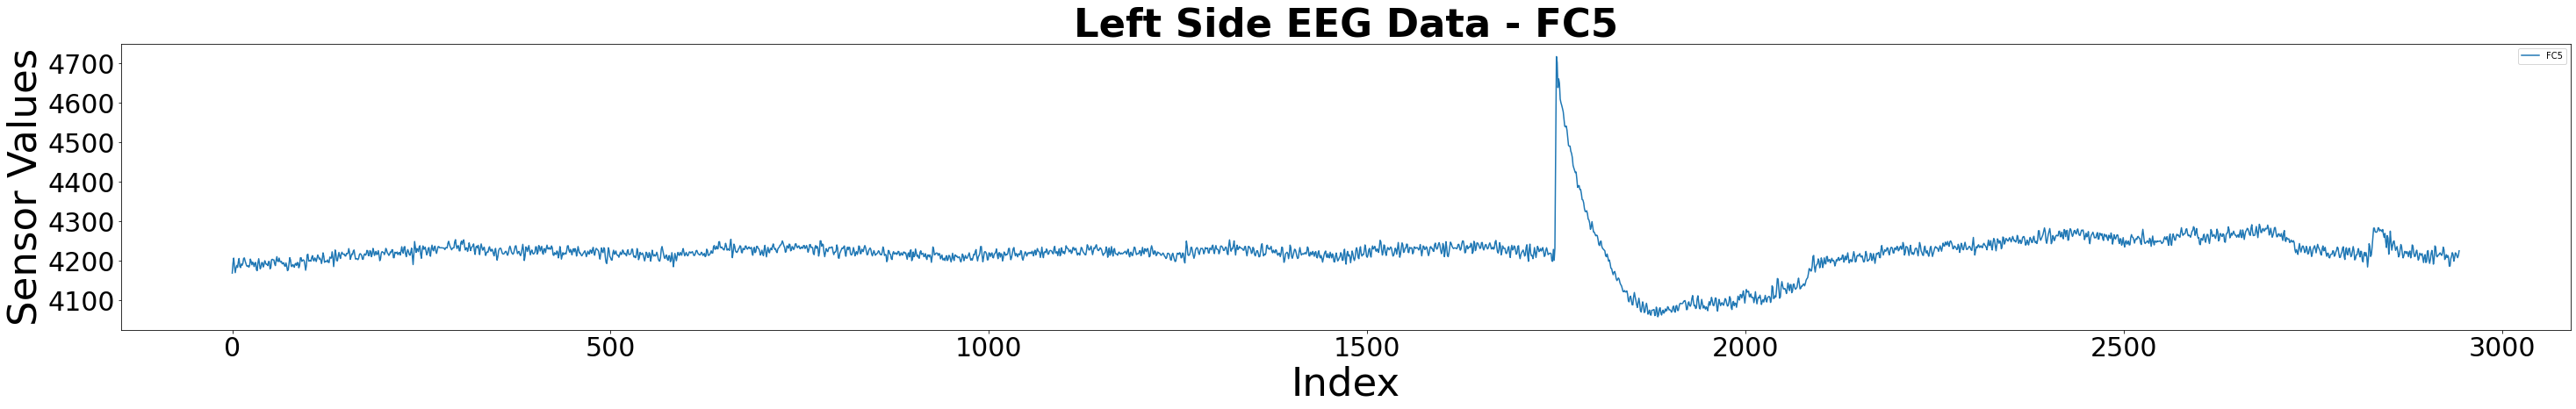

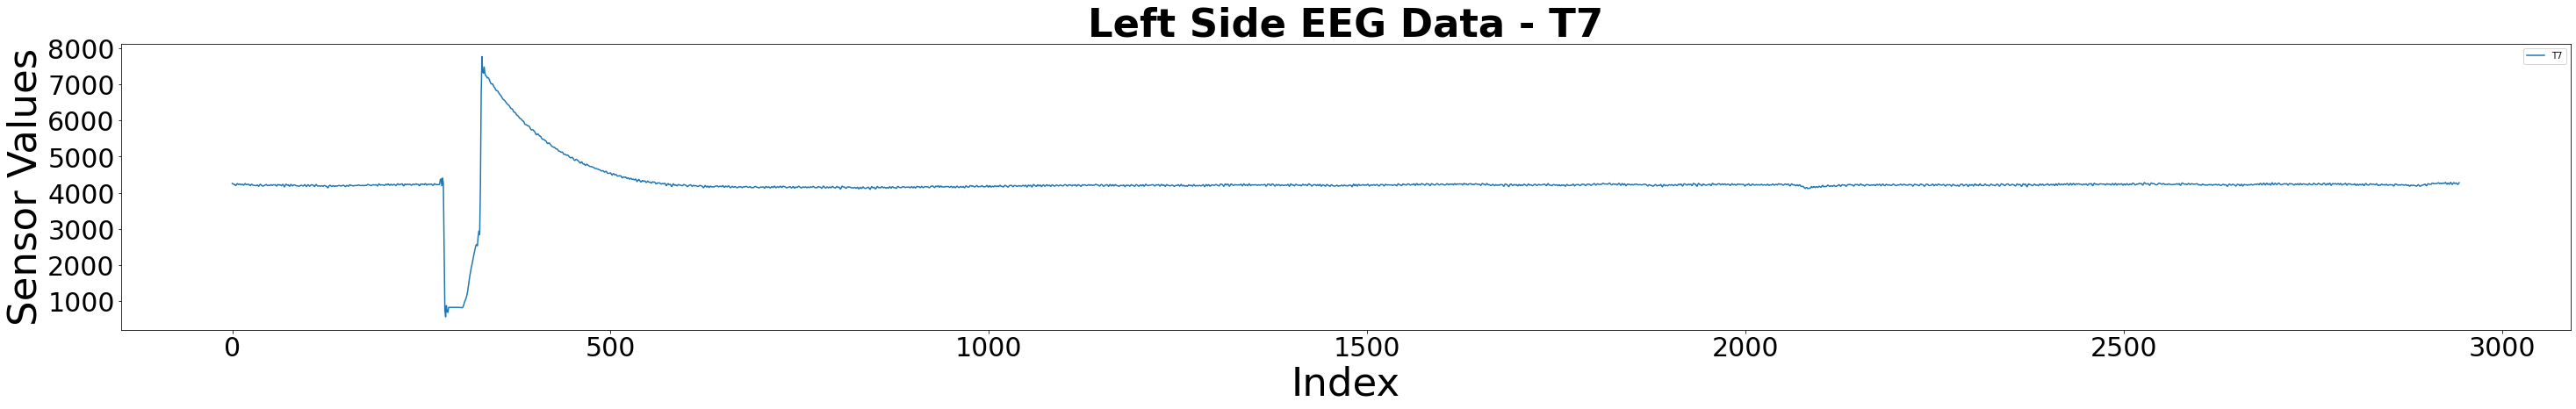

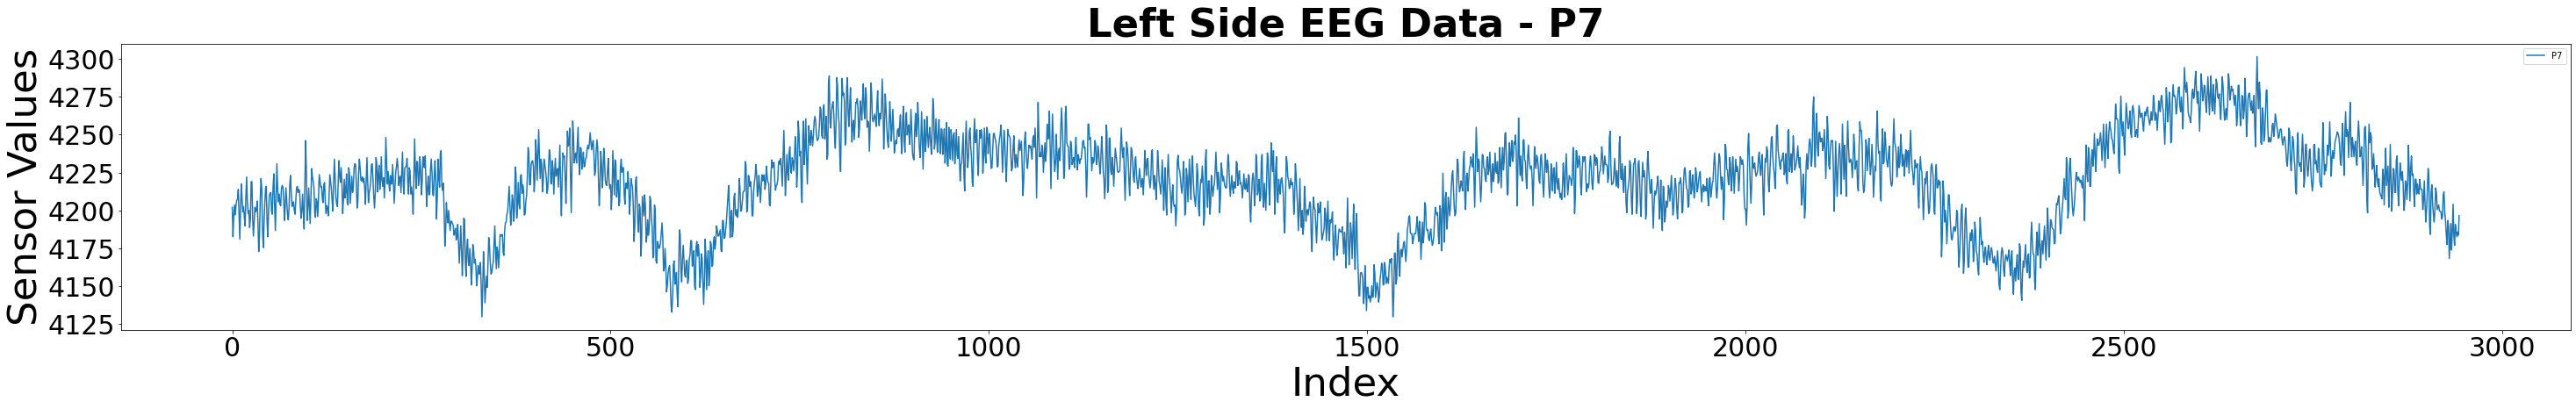

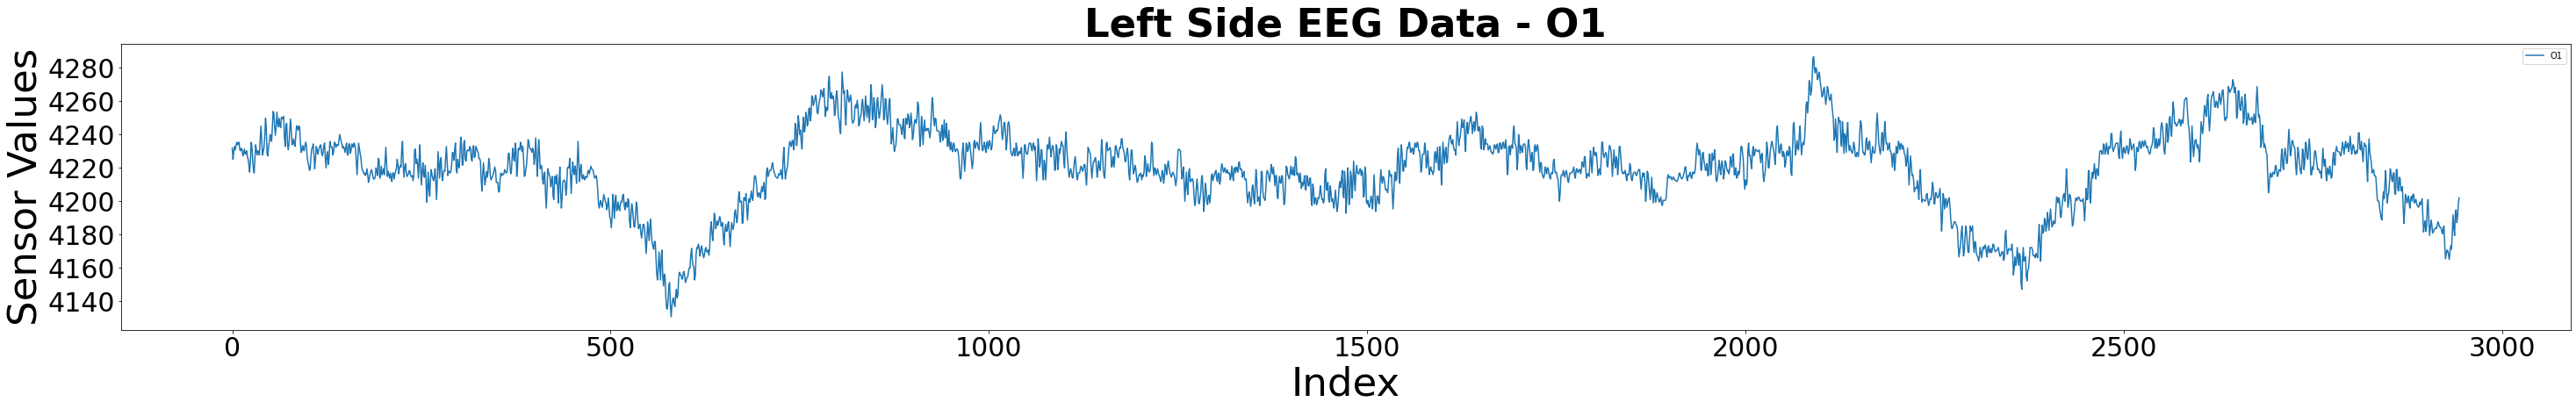

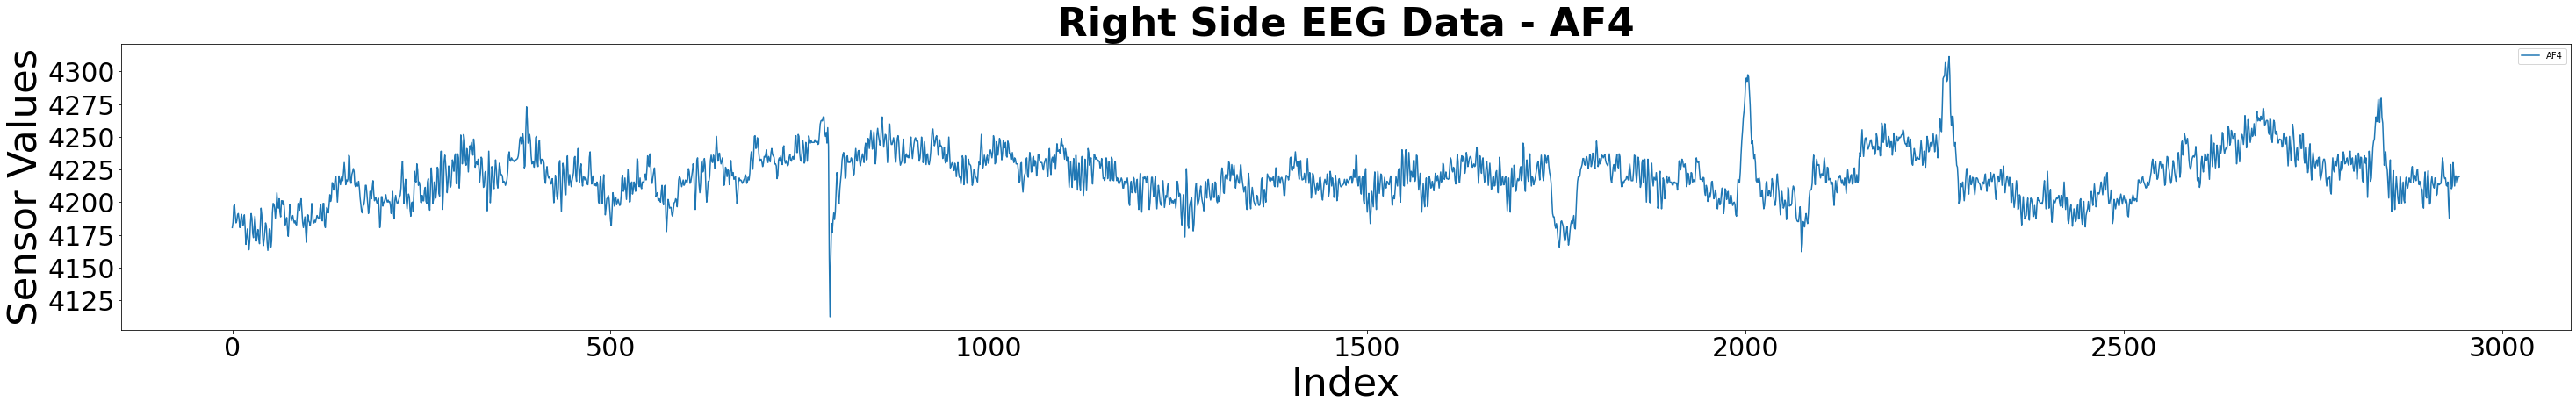

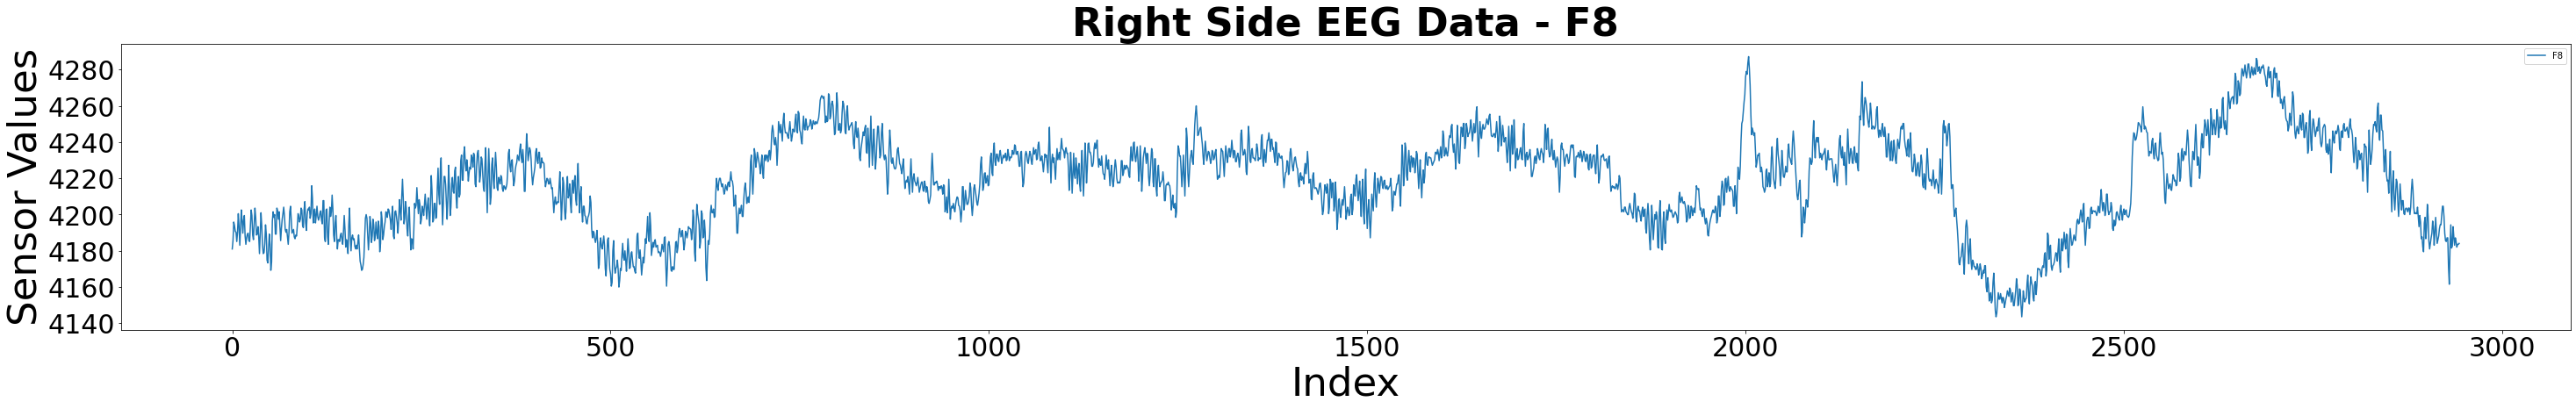

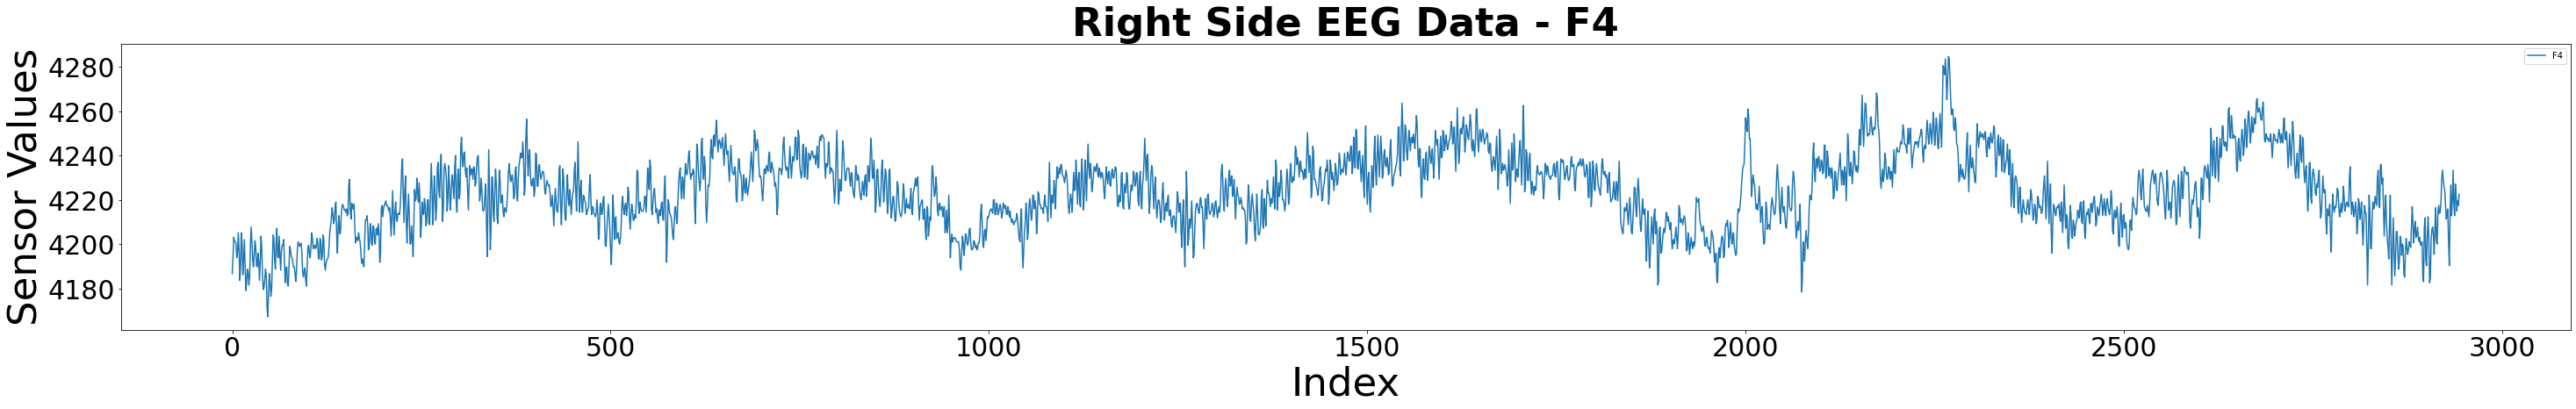

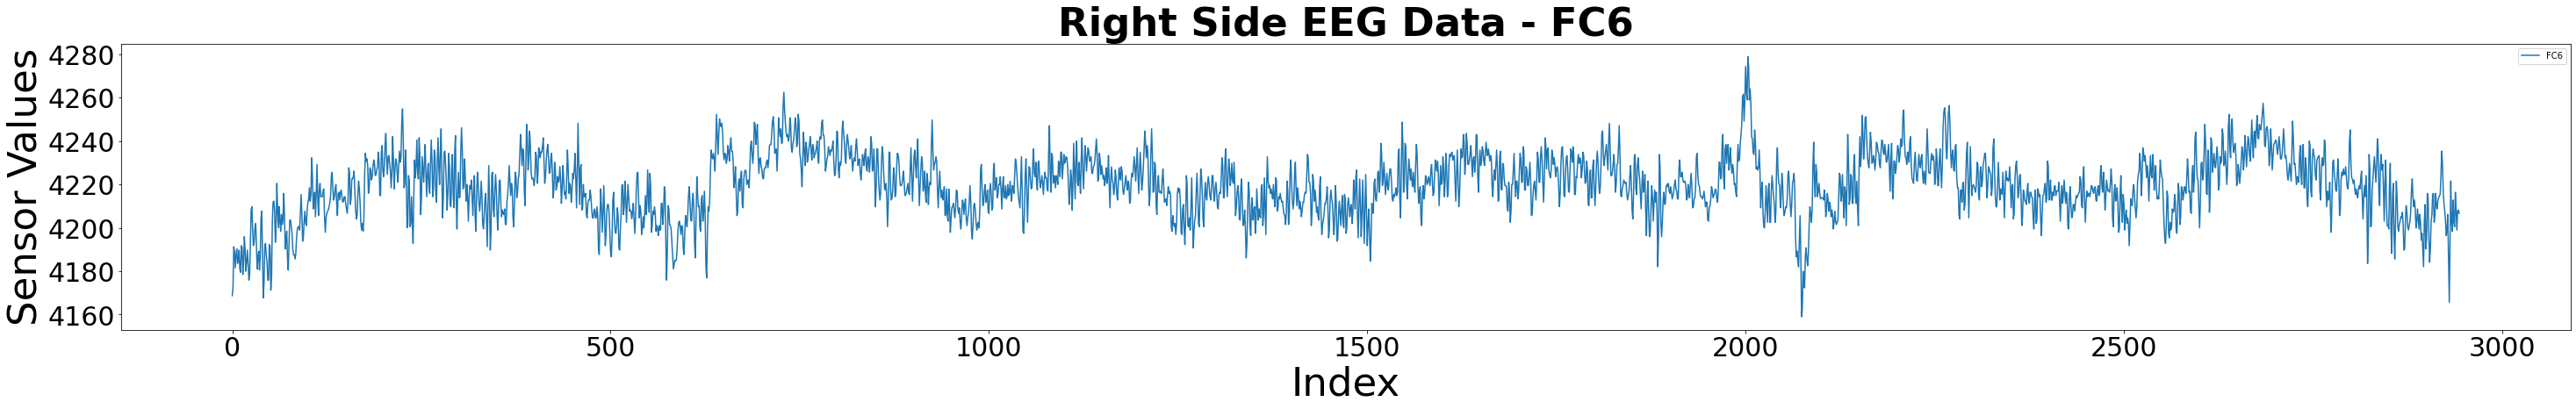

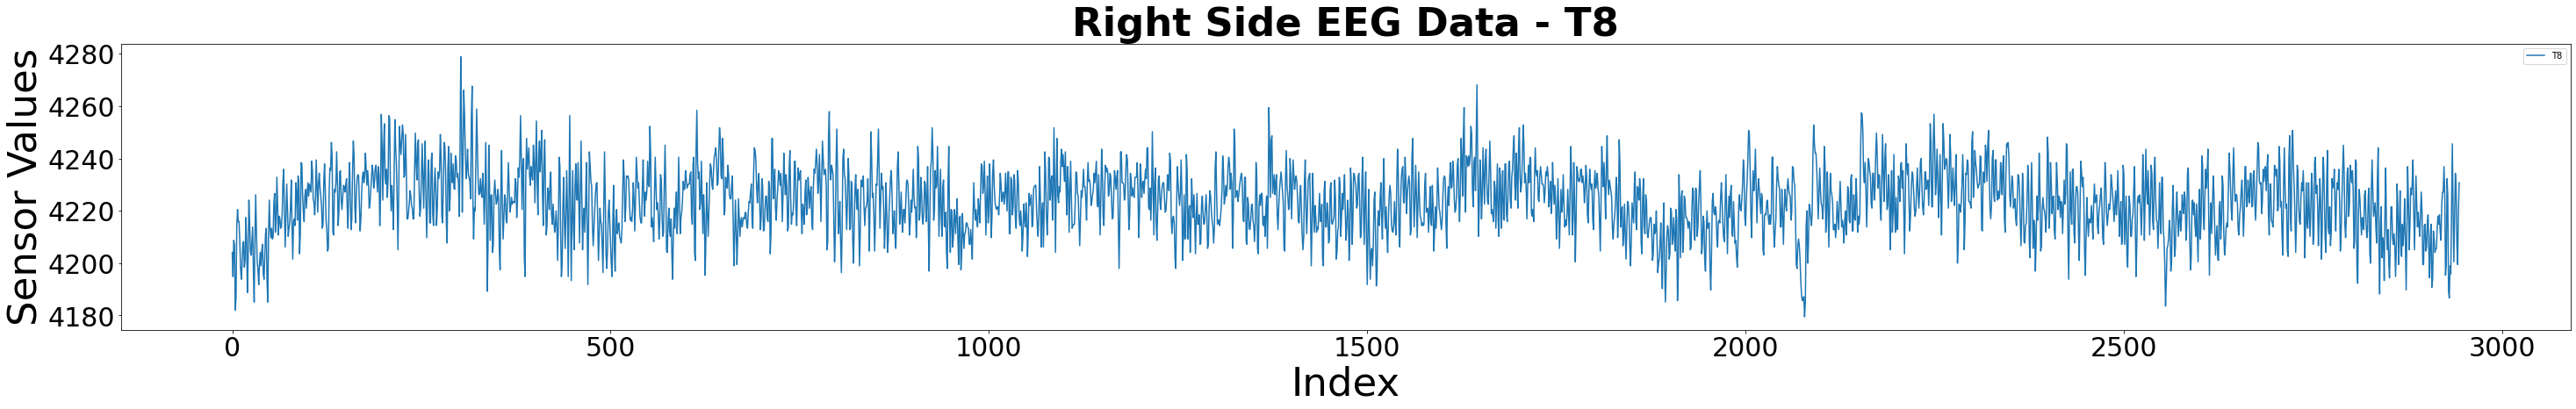

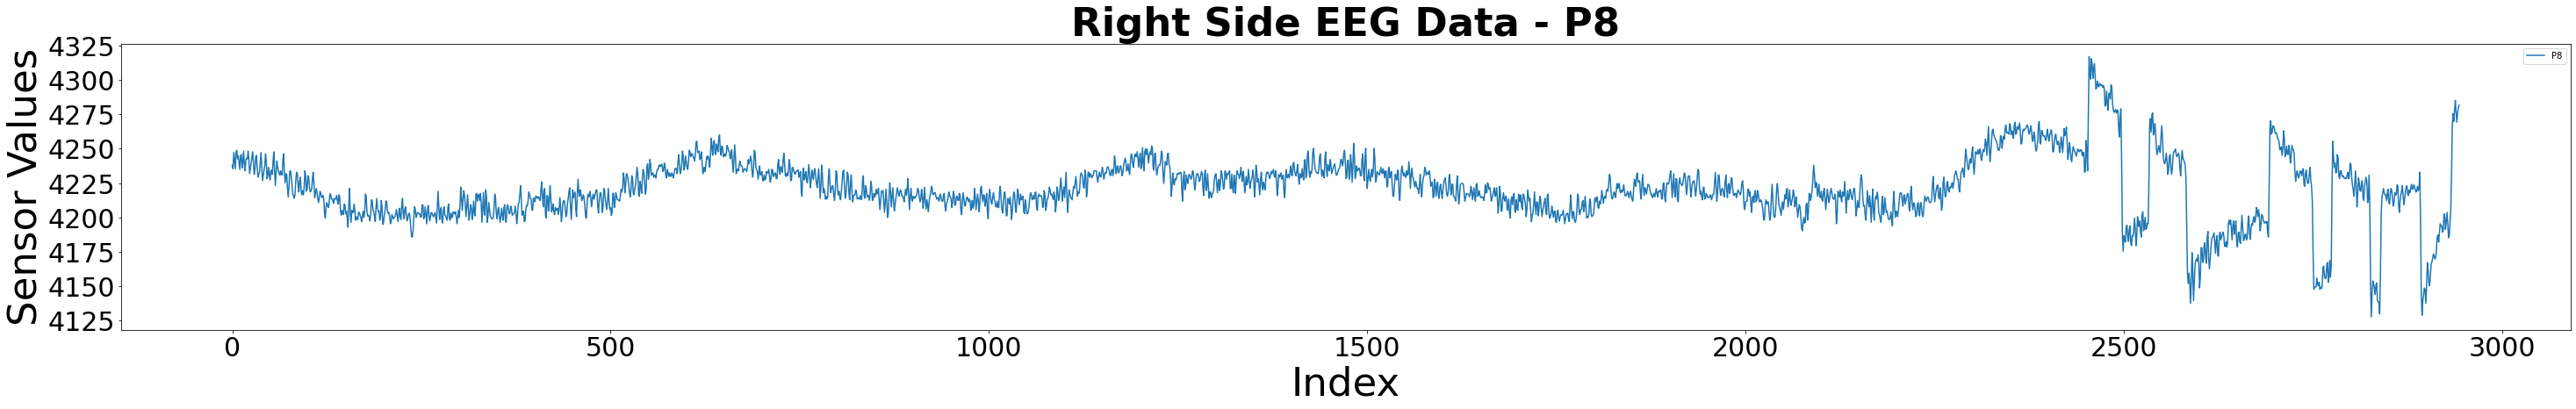

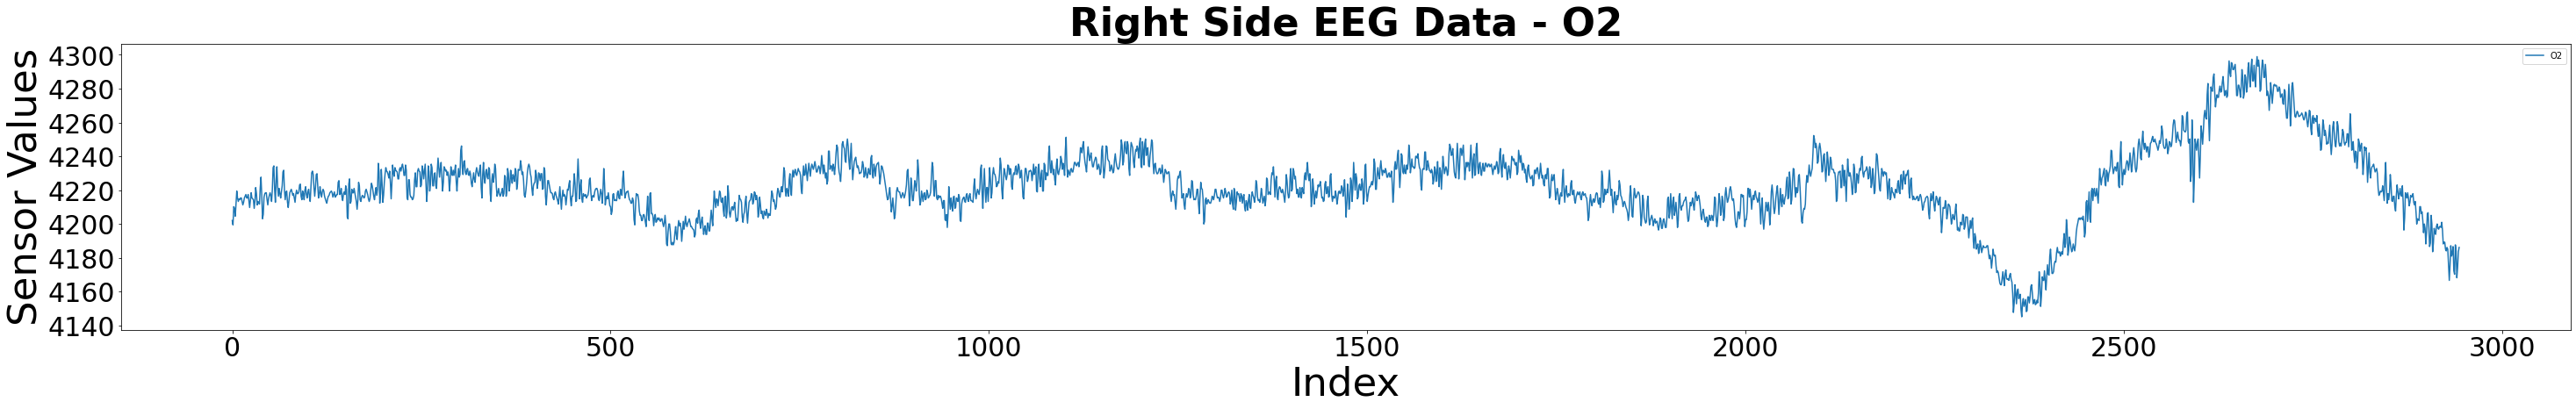

In [159]:
for sensor in left_sensors:
    plt.figure(figsize=(50, 6))
    plt.plot(df3_1.index, df3_1[sensor], label=sensor)
    plt.xlabel('Index', fontsize=45)
    plt.ylabel('Sensor Values', fontsize=45)
    plt.title(f'Left Side EEG Data - {sensor}', fontsize=45, fontweight='bold')
    plt.legend()
    plt.xticks(fontsize=30)  
    plt.yticks(fontsize=30)  
    plt.show()

for sensor in right_sensors:
    plt.figure(figsize=(50, 6))
    plt.plot(df3_1.index, df3_1[sensor], label=sensor)
    plt.xlabel('Index', fontsize=45)
    plt.ylabel('Sensor Values', fontsize=45)
    plt.title(f'Right Side EEG Data - {sensor}', fontsize=45, fontweight='bold')
    plt.legend()
    plt.xticks(fontsize=30)  
    plt.yticks(fontsize=30)  
    plt.show()

As we made earlier observation on the T7 sensor, its more consistant around the value of 4200 or so. It highly fluctuated only once during examination. Also the right side of the brain has more fluctuations which do indicate activity more on right side. To analyze more we need to know how the EEG works and its use.

#### Part 2

#### go_ny (2k x 7k): Check-ins from the app Gowalla, from the New York area.
The data set has below description:

Gowalla is a location-based social networking website where users share their locations by checking-in. The friendship network is undirected and was collected using their public API, and consists of 196,591 nodes and 950,327 edges. We have collected a total of 6,442,890 check-ins of these users over the period of Feb. 2009 - Oct. 2010.

In [134]:
df3_2 = pd.read_csv('~/task3/train.csv')

In [135]:
df3_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63094 entries, 0 to 63093
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       63094 non-null  int64
 1   30      63094 non-null  int64
 2   2       63094 non-null  int64
dtypes: int64(3)
memory usage: 1.4 MB


In [144]:
df3_2.head()

,0,30,2
0,0,34,1
1,0,64,1
2,0,68,2
3,0,76,1
4,0,77,1


In [146]:
rows = df3_2['0'].values
cols = df3_2['30'].values
values = df3_2['2'].values

coo_sparse_matrix = coo_matrix((values, (rows, cols)))


In [148]:
print(coo_sparse_matrix)

  (0, 34)	1
  (0, 64)	1
  (0, 68)	2
  (0, 76)	1
  (0, 77)	1
  (0, 93)	1
  (0, 141)	1
  (0, 148)	3
  (0, 188)	2
  (0, 190)	5
  (0, 313)	4
  (0, 357)	1
  (0, 381)	1
  (0, 423)	1
  (0, 477)	1
  (0, 538)	10
  (0, 559)	1
  (0, 623)	1
  (0, 625)	4
  (0, 668)	1
  (0, 724)	1
  (0, 781)	1
  (0, 790)	1
  (0, 849)	4
  (0, 852)	1
  :	:
  (2143, 233)	2
  (2143, 2431)	1
  (2143, 5595)	1
  (2143, 7167)	1
  (2144, 870)	1
  (2144, 1894)	1
  (2144, 2733)	1
  (2144, 4407)	1
  (2145, 16)	1
  (2145, 1747)	1
  (2145, 7270)	1
  (2145, 7310)	1
  (2146, 552)	1
  (2146, 1405)	1
  (2146, 3071)	1
  (2146, 3809)	1
  (2147, 749)	1
  (2147, 6621)	1
  (2147, 6960)	2
  (2148, 233)	1
  (2149, 1078)	1
  (2149, 4546)	1
  (2149, 6411)	1
  (2150, 233)	1
  (2592, 7705)	0


So the base idea is the data represents number of times a user visited places. So below are representation of the data.

0  - User  (we can consider as user id)

30 - Place (we can consider this as the place id)

2  - Value (number of times visited by user)

One good visualization we can make is the highest visited place by users. 

In [170]:
new_df3_2 = df3_2.copy()

In [172]:
new_df3_2.columns = ['User', 'Place', 'Visits']

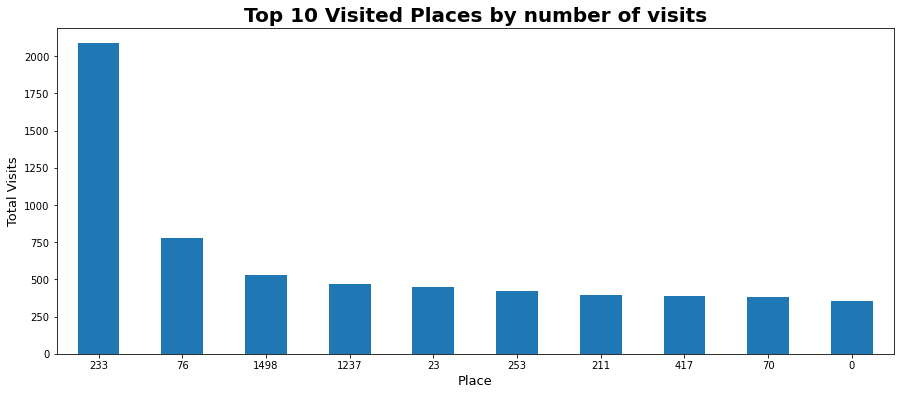

In [216]:
places_visits = new_df3_2.groupby('Place')['Visits'].sum().sort_values(ascending=False)
plt.figure(figsize=(15, 6))
places_visits[:10].plot(kind='bar')
plt.title('Top 10 Visited Places by number of visits', fontsize=20, fontweight='bold')
plt.xlabel('Place', fontsize=13)
plt.ylabel('Total Visits', fontsize=13)
plt.xticks(rotation= 0)
plt.show()

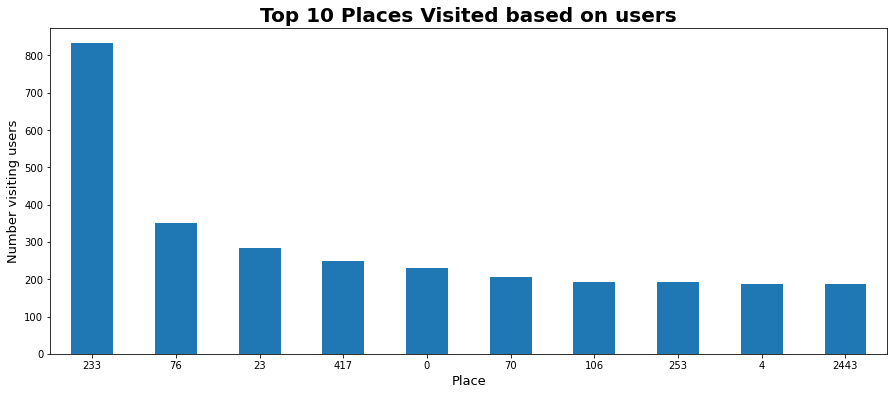

In [215]:
place_mostusers = new_df3_2.groupby('Place')['User'].nunique().sort_values(ascending=False)
plt.figure(figsize=(15, 6))
place_mostusers[:10].plot(kind='bar')
plt.title('Top 10 Places Visited based on users', fontsize=20, fontweight='bold')
plt.xlabel('Place', fontsize=13)
plt.ylabel('Number visiting users', fontsize=13)
plt.xticks(rotation=0)
plt.show()

The above two plots are crucial in understanding the significance of the place in the app. The first bar plot shows places that has more number of visits. Where as the second is the bar plot which shows the number of users that visited the place. These two and important to understand the popularity of the place. We can see that 233 is the most visited place both by users and number of visits. Same goes for 76 place too. But we can see that 1498 is a place that has more visits but they are not by many users, means it frequently visited place by a specific set of users. But the 23 has more number of visits by diffrent users.

With this we can make a good guess that the 23 can be a new place and this is running a marketing strategy to attract users to visit. Where as 1498 is a unique place with high popularity among small set of individuals. This may be a elite cafe or something which has exclusive access to some set of users. It can be a golf club too.

This type of reasoning can be deduced from above information.